## Preparando ambiente computacional

In [54]:
import sys
import pandas as pd
import numpy as np

# adiciona a pasta que estão em funções para usar os módulos
sys.path.insert(0, './funcoes/')

# carrega os módulos da pasta funçoes
from funcoes.load_data import load_data
from funcoes.modelo import modelo_lr
from funcoes.save_file import save_file
from funcoes.analise_perfil import criar_tabela_perfil
from funcoes.plotar_media_tempo import plotar_grafico

## Carregando a base de dados

* [Tratamento dos dados](./pr_tratamento.ipynb)
* [load_data](./funcoes/load_data.py)

In [39]:
arquivo_train = './input_data/pr_train.feather'
data_train = load_data(arquivo_train)

arquivo_test = './input_data/pr_test.feather'
data_test = load_data(arquivo_test)

arquivo_train_dummies = './input_data/pr_train_dummies.feather'
data_train_dummies = load_data(arquivo_train_dummies)

arquivo_test_dummies = './input_data/pr_test_dummies.feather'
data_test_dummies = load_data(arquivo_test_dummies)

## Primeiro Modelo

* Avaliação do R²
* Parametrização do modelo: [Modelo OLS](./funcoes/modelo.py)

In [40]:
modelo = modelo_lr(df=data_train_dummies)

In [41]:
# salva em arquivos as métricas
sumario = str(modelo.summary())
save_file(sumario, './output/sumario_modelo.txt')

In [42]:
r_ajustado = np.round(modelo.rsquared_adj,2)
print(f"R² ajustado: {r_ajustado}")

R² ajustado: 0.43


## Análise de Perfil

* [Código - Tabela de Perfil](./funcoes/analise_perfil.py)
* [Gráfico da média temporal](./funcoes/plotar_media_tempo.py)

In [56]:
# inicia a tabela de perfil
tabela = criar_tabela_perfil(data_train)

# cria o gráfico da média de temporal
plotar_grafico(tabela)

ValueError: Bin edges must be unique: array([ 0.11780822,  0.82739726,  1.46849315,  2.10958904,  2.93424658,
        3.64657534,  4.30410959,  4.95890411,  5.77808219,  6.63835616,
        7.5260274 ,  7.76730495,  7.76730495,  7.76730495,  8.10684932,
        9.09315068, 10.43013699, 12.46082192, 15.21917808, 20.19452055,
       42.90684932]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [47]:
df = data_train.copy()
# Categorize 'tempo_emprego' em 20 quantis
df['tempo_emprego_categoria'] = pd.qcut(df['tempo_emprego'], q=20, duplicates='drop')

# Criação da coluna log(renda)
df['log_renda'] = np.log(df['renda'])

# Criação da tabela de perfil
tabela_perfil = pd.DataFrame()
tabela_perfil['Observações'] = df.groupby('tempo_emprego_categoria').size()
tabela_perfil['Média do Log-Renda'] = df.groupby('tempo_emprego_categoria')['log_renda'].mean()
tabela_perfil['Média do Tempo de Emprego'] = df.groupby('tempo_emprego_categoria')['tempo_emprego'].mean()


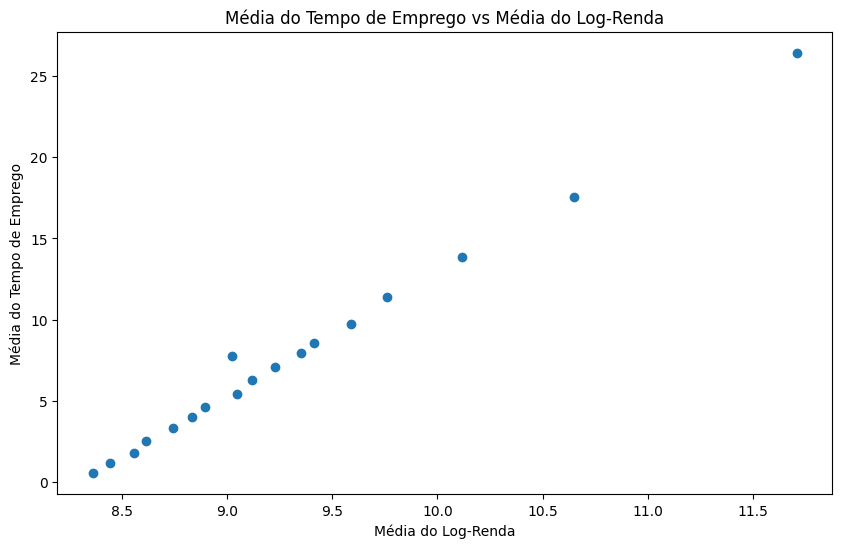

In [55]:
plotar_grafico(tabela_perfil)